<a href="https://colab.research.google.com/github/Anjoom765/data_science_fcc/blob/main/resampling__reglarisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
data=pd.read_csv('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/Advertising.csv', index_col=0)
data.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [33]:
def scatter_plot(feature):
  plt.figure(figsize=(5,5))
  plt.scatter(data[feature],data["sales"],color="black")
  plt.xlabel('money spendon feature')
  plt.ylabel('sales')
  plt.show()

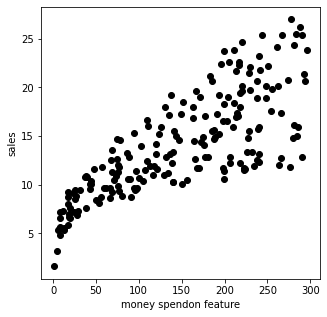

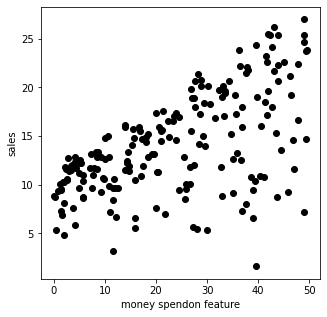

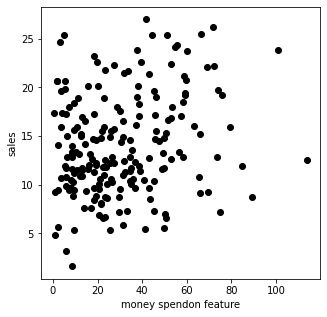

In [34]:
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

base line model

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [36]:
X=data.drop('sales',axis=1)
Y=data['sales'].values.reshape(-1,1)



In [37]:
model= LinearRegression()
MSEs=cross_val_score(model,X,Y,cv=5,scoring="neg_mean_squared_error")
mean=np.mean(-MSEs)
mean

3.0729465971002106

ridge regression/regularization

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [39]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regression= GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regression.fit(X,Y);


In [40]:
print(ridge_regression.best_params_)
print(-ridge_regression.best_score_)

{'alpha': 20}
3.072671338341143


In [43]:
from sklearn.linear_model import Lasso

lasso regressor

In [47]:
lasso = Lasso(tol=0.05)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X, Y)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.035998320911191
